### (1,6,2) curves

These curves do offer a nice paramtrization. Let's see if that fixes things.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [2, 2]

In [4]:
N = 3
d = 2^N
F = GF(d, 'x')
x = F.gen()

In [5]:
def Proj(u, v=None):
    if not v:
        v = u
    return u * v.conjugate_transpose()

Id = identity_matrix(SR, 2**N)

def toInt(k):
    return list(F).index(k)

def chi(k):
    return exp(2 * pi * I * int(k.trace()) / 2)

In [22]:
R = PolynomialRing(Integers(4), 't')
t = R.gen()
poly = t^3 + 2*t^2 + t - 1

GR = R.quotient(poly, 'w')
w = GR.gen()
GR

Univariate Quotient Polynomial Ring in w over Ring of integers modulo 4 with modulus t^3 + 2*t^2 + t + 3

In [24]:
T = [GR(0)] + [w**j for j in range(1, 2**N - 1)] + [GR(1)]
T

[0, w, w^2, 2*w^2 + 3*w + 1, 3*w^2 + 3*w + 2, w^2 + 3*w + 3, w^2 + 2*w + 1, 1]

In [25]:
def TeichLift(k):
    return T[toInt(k)]

hat = TeichLift

In [39]:
def Fourier():
    s = zero_matrix(SR, 2**N, 2**N)
    for i, a in enumerate(F):
        for j, b in enumerate(F):
            s[i,j] = chi(a * b) / sqrt(2^N)
    return s
FF = Fourier()

def Z(a):
    return diagonal_matrix([chi(a * k) for k in F])

def X(b):
    return FF.conjugate_transpose() * Z(b) * FF

The general form of the curves is $f_\mu(\alpha) = \mu \alpha + \alpha^2 + \alpha^4$ where $x$ is the field generator and $\mu = x^k$ for some $k$. In particular we will use $x = 1$. So the curves are:
$$
\begin{align*}
\alpha &= 0 \\
f_0(\alpha) &= \alpha^2 + \alpha^4 \\
f_\mu(\alpha) &= \mu \alpha + x \alpha^2 + x \alpha^4 \\
f_{\mu^2}(\alpha) &= \mu^2 \alpha + \alpha^2 + \alpha^4 \\
f_{\mu^3}(\alpha) &= \mu^3 \alpha + \alpha^2 + \alpha^4 \\
f_{\mu^4}(\alpha) &= \mu^4 \alpha + \alpha^2 + \alpha^4 \\
f_{\mu^5}(\alpha) &= \mu^5 \alpha + \alpha^2 + \alpha^4 \\
f_{\mu^6}(\alpha) &= \mu^6 \alpha + \alpha^2 + \alpha^4 \\
f_1(\alpha) &= \alpha + \alpha^2 + \alpha^4
\end{align*}
$$

In [50]:
# (1,6,2)
curves = [
    lambda a: a^2 + a^4,
    lambda a: x^1 * a + a^2 + a^4,
    lambda a: x^2 * a + a^2 + a^4,
    lambda a: x^3 * a + a^2 + a^4,
    lambda a: x^4 * a + a^2 + a^4,
    lambda a: x^5 * a + a^2 + a^4,
    lambda a: x^6 * a + a^2 + a^4,
    lambda a: x^0 * a + a^2 + a^4
]

# Lifted to T
curves_T = [
    lambda a: a^2 + a^4,
    lambda a: w^1 * a + a^2 + a^4,
    lambda a: w^2 * a + a^2 + a^4,
    lambda a: w^3 * a + a^2 + a^4,
    lambda a: w^4 * a + a^2 + a^4,
    lambda a: w^5 * a + a^2 + a^4,
    lambda a: w^6 * a + a^2 + a^4,
    lambda a: w^0 * a + a^2 + a^4
]

Let's see if the subspaces generated by the curves are totally isotropic.

In [31]:
for j, curve in enumerate(curves):
    subspace = [(a, curve(a)) for a in F]
    # The curves are subspaces
    for p1 in subspace:
        for p2 in subspace:
            if (p1[0] + p2[0], p1[1] + p2[1]) not in subspace:
                raise Exception('Curve is not a subspace.', j)
    
    # The curves are not abelian
    for p1 in subspace:
        for p2 in subspace:
            c = p1[0] * p2[1] - p1[1] * p2[0]
            if c.trace() != 0:
                raise Exception('Not isotropic!', j)

In her proof, the only thing required of the $f$ is that for all elements of the field we have
$$
\chi(\xi f(\alpha)) = \chi(\alpha f(\xi)),
$$
where $\chi$ is the additive group character $\chi(\kappa) = \omega^{tr(\kappa)}$ where $\omega$ is a primitive root of unity. This equality is true if and only if
$$
tr(\xi f(\alpha)) = tr(\alpha f(\xi)).
$$
This is true for symplectic presemifields, that is to say, presemifield operations that generate a symplectic spread. In our case the curves aren't generated by a single parameter and so can't really be seen as a binary operation and hence as a presemifield. Even so, we can test that each curve satisfies this property:

In [32]:
for c in curves:
    for alpha in F:
        for xi in F:
            if (alpha * c(xi)).trace() != (xi * c(alpha)).trace():
                raise Exception('Property does not hold for curve {}'.format(c))

The same property should hold for the Teichmüller set according to Kanat.

In [33]:
for c in curves_T:
    for alpha in T:
        for xi in T:
            if (alpha * c(xi)).trace() != (xi * c(alpha)).trace():
                raise Exception('Property does not hold for curve {}'.format(c))

Following Sainz's proof there doesn't seem to be a reason why these curves can't be used to construct the appropriate rotation operators. But before moving on let's check to see if the curves generate an affine plain, at least in the sense that the curves only intersect at the origin.

In [34]:
subspaces = [[(k, f(k)) for k in F] for f in curves]
for i, s1 in enumerate(subspaces):
    for j, s2 in enumerate(subspaces):
        if i != j:
            cap = list(set(s1) & set(s2))
            if cap != [(F(0), F(0))]:
                raise Exception('Non trivial intersection!', i, j, cap)

All is well, this means that at a single point, there will only be $2^N+1$ curves that pass through it:

In [35]:
for alpha in F:
    for beta in F:
        cnt = 0
        for f in curves:
            for nu in F:
                if beta == f(alpha) + nu:
                    cnt += 1
        if cnt != 8:
            raise Exception('More curves passed through the point ({}, {})!'.format(alpha, beta))

All is well with these curves.

In [40]:
def phi(tau, nu):
    return (I)^(int((tau * nu).trace()))

def D(a, b):
    return phi(hat(a), hat(b)) * Z(a) * X(b)

def V(mu):
    s = zero_matrix(SR, 2^N, 2^N)
    curve = curves_T[toInt(mu)]
    for i, k in enumerate(F):
        a = TeichLift(k)
        s += phi(a, curve(a)) * Proj(FF[:,i])
    return s

In [41]:
for k in F:
    if V(x)[:,toInt(k)] != (V(x) * X(k) * Id[:,0]):
        raise Exception('Ordering is not right!')

In [42]:
# Orthonormality
def isOrthonormal(m):
    return m.conjugate_transpose() * m == Id

# MUBs
def isMUB(m1, m2):
    m = (
        m1.conjugate_transpose() * m2
    ).apply_map(lambda t: abs(t)^2)
    return m == ones_matrix(2^N, 2^N) / (2^N)

def checkMUBs(mubs):
    if type(mubs) != list:
        mubs_list = []
        for i in range(2^N+1):
            mubs_list.append(mubs[(i*2^N):(i+1)*2^N,:])
    else:
        mubs_list = mubs
            
    for i in range(2^N+1):
        for j in range(2^N+1):
            if i == j:
                if not isOrthonormal(mubs_list[i]):
                    raise Exception(
                        'Encountered a basis that is not orthonormal!',
                        i
                    )
            else:
                if not isMUB(mubs_list[i], mubs_list[j]):
                    raise Exception(
                        'Encountered non-MUB pairs of basis!',
                        i, j
                    )
    return True

In [109]:
mubs = [FF] + [V(mu) for mu in F]
checkMUBs(mubs)

True

So the set of basis are MUBs. Now let's just check that there isn't anything weird going on with the correspondence between vectors. 

For example, for $\mu = 0$, we have the curve $f_0(\alpha) = \alpha^2 + \alpha^4$, and so the set $V(0)$ should be invariant (modulo $\pm 1$ phases) under all of the displacement operators of the form $D(\alpha, f_0(\alpha))$.

In [88]:
mu = x^3
alpha = x^1
curve = curves[toInt(mu)]
V(mu) * 2

[ 0 -I  0  0  1  0  I  1]
[-I  0  1  1  0  I  0  0]
[ 0  1  0  0 -I  0  1  I]
[ 0  1  0  0  I  0  1 -I]
[ 1  0 -I  I  0  1  0  0]
[ 0  I  0  0  1  0 -I  1]
[ I  0  1  1  0 -I  0  0]
[ 1  0  I -I  0  1  0  0]

In [89]:
D(alpha, curve(alpha)) * V(mu) * 2

[ 0  I  0  0  1  0  I -1]
[ I  0  1 -1  0  I  0  0]
[ 0 -1  0  0 -I  0  1 -I]
[ 0 -1  0  0  I  0  1  I]
[-1  0 -I -I  0  1  0  0]
[ 0 -I  0  0  1  0 -I -1]
[-I  0  1 -1  0 -I  0  0]
[-1  0  I  I  0  1  0  0]

In [110]:
npMUBs = [m.numpy(dtype='complex128') for m in mubs]

In [116]:
import numpy as np

def saveMUBs(mubs, name='mubs.npy'):
    # M = mubs[0].numpy(dtype='complex128')
    M = mubs[0]
    for m in mubs[1:]:
        # M = np.concatenate((M, m.numpy(dtype='complex128')))
        M = np.concatenate((M, m))
    np.save(name, M)

In [118]:
saveMUBs(npMUBs, 'sainz/162.npy')

An important step in the calculation of the inner product is the use the of the rotation operator coefficients recurence properties, in particular:
$$
c_{\eta, f_x(\eta)} c_{\eta', f_x(\eta')}
= c_{\eta-\eta', f_x(\eta) - f_x(\eta')} \chi\left(-\eta' f_x(\eta - \eta')\right).
$$
Let's see if this holds for the Galois ring induced phase:
$$
c_{\eta, f_x(\eta)} = \Phi(\eta, f_x(\eta)) = \omega^{tr(\hat{\eta} f_x(\hat{\eta})}.
$$

In [90]:
hat = TeichLift # for notation
for j, f in enumerate(curves):
    for eta in F:
        for etap in F:
            f_hat = curves_T[j]
            l = phi(hat(eta), f_hat(hat(eta))) * phi(hat(etap), f_hat(hat(etap))).conjugate()
            r = phi(hat(eta + etap), f_hat(hat(eta + etap))) * chi(etap * f(eta + etap))
            if l != r:
                raise Exception('Recurrence property is not satisfied!', j, eta, etap)

So the recurrence relation is satisfied appropriately and the curves satisfy the isotropic property which means Sainz's proof should be applicable. In order to computationally verify the proof we need to calculate the standard set of MUBs.

In [91]:
def VW(mu):
    s = zero_matrix(SR, 2^N, 2^N)
    for i, k in enumerate(F):
        s += phi(TeichLift(k), TeichLift(mu * k)) * Proj(FF[:,i])
    return s

In [92]:
mubs306 = [FF] + [VW(mu) for mu in F]
checkMUBs(mubs306)

True

For a given point $(\alpha,\beta)$ we need to compute which lines are incident to it, and then obtain the associated states $|\psi_\nu^\mu\rangle$, where $\mu$ and $\nu$ parametrize the line.

In [25]:
def getStateFromMu(a, b, mu, M=mubs306):
    # non-Fourier states
    nu = b - a * mu
    return M[toInt(mu) + 1][:, toInt(nu)]

In [26]:
def getStateFromCurve(curve_param, nu, M=mubs):
    # non-Fourier states
    return M[toInt(curve_param) + 1][:, toInt(nu)]

According the calculation we have:
$$
|\langle \psi_\nu^\mu | \psi_\kappa^{f_x}\rangle|^2
= \frac{1}{d} \sum_{\xi} c_{\xi, f_x(\xi)} c_{\xi, \xi\mu}^* \chi(\xi(\kappa + \beta + \mu\alpha))
\delta_{\mu\xi, f_x(\xi)}.
$$

Let's verify this.

In [27]:
def inp(u, v):
    u = vector(u)
    v = vector(v)
    return u.conjugate() * v

In [28]:
hat = TeichLift
def Sainz(a, b, mu, curve_param, k):
    s = 0
    for xi in F:
        curve_idx = toInt(curve_param)
        if mu * xi == curves[curve_idx](xi):
            c_mu = phi(hat(xi), hat(xi * mu)).conjugate()
            c_fx = phi(hat(xi), curves_T[curve_idx](hat(xi)))
            char = chi(xi * (k + b + mu * a))
            s += c_mu * c_fx * char / 2^N
    return s

In [30]:
# this takes a while, but it will verify this part
# of the proof.

for alpha in F:
    for beta in F:
        for curve_param in F:
            for kappa in F:
                for mu in F:
                    u = getStateFromMu(alpha, beta, mu)
                    v = getStateFromCurve(curve_param, kappa)
                    
                    if abs(inp(u, v))**2 != Sainz(alpha, beta, mu, curve_param, kappa):
                        raise Exception(
                            'Inner products do not match!',
                            alpha, beta, mu, curve_param, kappa
                        )

All is well with that part! Now onto the final important part of the proof. Summing over $\mu \in F$ should give us:
$$
\sum_\mu
|\langle \psi_\nu^\mu | \psi_\kappa^{f_x}\rangle|^2
= 1 + \frac{1}{d} \sum_{\xi \in F} \chi(\xi(\kappa + \beta + f_x(\alpha))) - \frac{1}{d}
= 1 - \frac{1}{d} + \delta_{\kappa, \beta + f_x(\alpha)}.
$$

In [29]:
alpha = x + 1
beta  = x
curve_param = x^2
kappa = x

v = getStateFromCurve(curve_param, kappa)

l = 0
for mu in F:
    u = getStateFromMu(alpha, beta, mu)
    l += abs(inp(u, v))^2

r = 1 - 1/2^N + int(kappa == beta - curves[toInt(curve_param)](alpha))

l, r

(11/8, 7/8)

Again, no luck.

In [52]:
def Wootters(a, b):
    op = Proj(FF[:, toInt(a)])
    for xi in F:
        for nu in F:
            d = int(b == curves[toInt(xi)](a) + nu)
            op += d * Proj(mubs[toInt(xi)+1][:, toInt(nu)])
    return op - Id

In [33]:
for a in F:
    for b in F:
        op = Wootters(a,b)
        if op != op.conjugate_transpose():
            raise Exception('Not self-adjoint.')

In [34]:
for a in F:
    for b in F:
        if Wootters(a, b).trace() != 1:
            raise Exception('Not unit trace.')

In [35]:
for a in F:
    for b in F:
        op1 = Wootters(a, b)
        for k in F:
            for l in F:
                op2 = Wootters(k, l)
                if (op1 * op2.conjugate_transpose()).trace() != 2^N * int(a == k) * int(b == l):
                    raise Exception('Not trace orthogonal.')

In [36]:
k = x
l = 1
for a in F:
    for b in F:
        if D(k,l) * Wootters(a, b) * D(k,l).conjugate_transpose() != Wootters(a+k, b+l):
            raise Exception('Not covariant.')

In [53]:
def WignerMatrix(state):
    op = zero_matrix(SR, 2^N, 2^N)
    for i, a in enumerate(F):
        for j, b in enumerate(F):
            op[i, j] = (state * Wootters(a, b)).trace() / 2^N
    return op

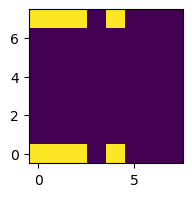

In [54]:
wf = WignerMatrix(Proj((Id[:,0] + Id[:,-1])/sqrt(2)))
plt.imshow(wf.apply_map(lambda t: float(t)).transpose(), origin='lower')

Let's use Sainz explicit vector construction:

In [82]:
def SainzVector(mu, k):
    s = zero_matrix(SR, 2^N, 1)
    for eta in F:
        for xi in F:
            c = phi(TeichLift(eta), TeichLift(mu * eta))
            char = chi(eta * (xi - k))
            s += c * char * Id[:, toInt(xi)]
    return s / 2^N

In [99]:
for mu in F:
    for k in F:
        if SainzVector(mu, k) != mubs306[toInt(mu) + 1][:,toInt(k)]:
            raise Exception('Not the same!')

In [100]:
def SainzVector2(mu, k):
    s = zero_matrix(SR, 2^N, 1)
    for eta in F:
        for xi in F:
            c = phi(TeichLift(eta), curves_T[toInt(mu)](TeichLift(eta)))
            char = chi(eta * (xi - k))
            s += c * char * Id[:, toInt(xi)]
    return s / 2^N

In [104]:
for mu in F:
    for k in F:
        if SainzVector2(mu, k) != mubs[toInt(mu) + 1][:,toInt(k)]:
            raise Exception('Not the same!')